<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [24]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-03 17:02:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  36.7MB/s    in 1.0s    

2024-10-03 17:02:51 (36.7 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [25]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

## Demo: How to run an sql query


In [27]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [65]:

table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


In [81]:
QUERY = """
SELECT DatabaseWorkedWith, Respondent
FROM DatabaseWorkedWith 




"""
py = pd.read_sql_query(QUERY,conn)
py
#py_sort= py.sort_values(by='Respondent', ascending=False)
#py_sort
# mysql_only = py[py['LanguageWorkedWith'].apply(lambda x: x == ['SQL'])]
# mysql_only_count = mysql_only.shape[0]
# py_sort['Rank'] = py_sort['Respondent'].rank(ascending=False, method='min').astype(int)
# py_rank = py_sort[py_sort['LanguageDesireNextYear'] == 'Python']['Rank'].values[0]
# py_rank
#mysql_only_count

mysql_only_df = py[py['DatabaseWorkedWith'].apply(lambda x: x == ['MySQL'])]
mysql_only_count = mysql_only_df.shape[0]
mysql_only_count

0

## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)



,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


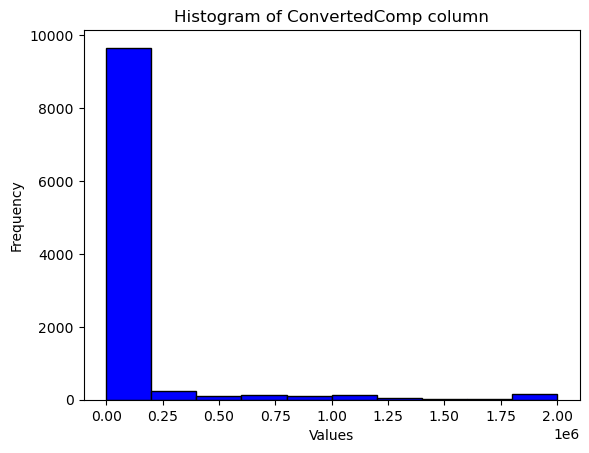

In [8]:
QUERY = """
SELECT  ConvertedComp
FROM master

"""
cc = pd.read_sql_query(QUERY,conn)
cc
plt.hist(cc, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of ConvertedComp column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


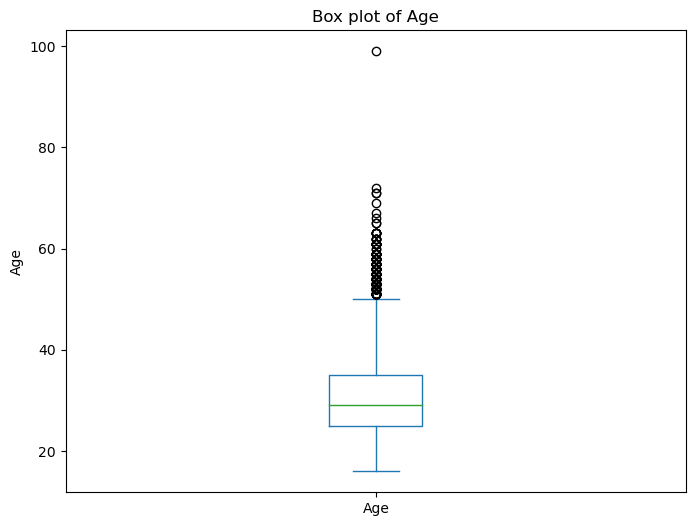

In [9]:
QUERY = """
SELECT  Age
FROM master

"""
ag = pd.read_sql_query(QUERY,conn)
ag
ag.plot(kind = 'box', figsize = (8,6))
plt.title('Box plot of Age')
plt.ylabel('Age')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


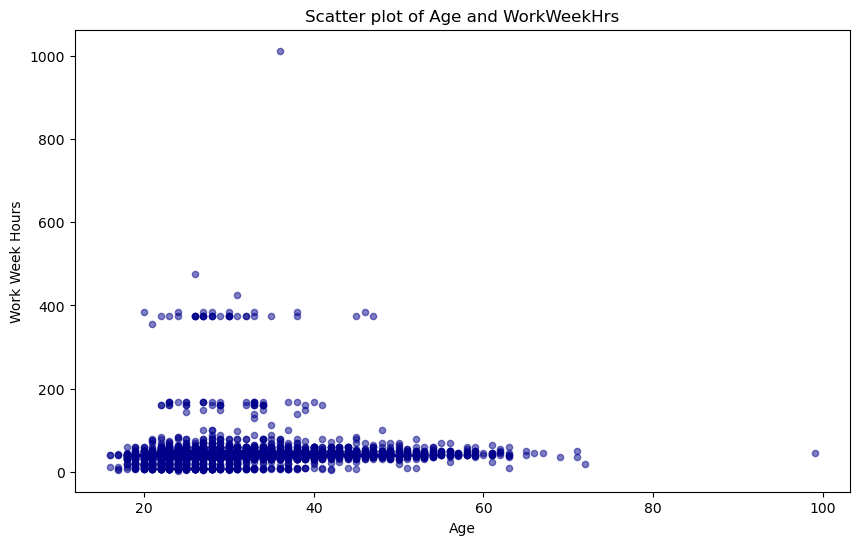

In [10]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
aw = pd.read_sql_query(QUERY,conn)

aw.plot(kind='scatter',x='Age', y='WorkWeekHrs', figsize=(10, 6), alpha=0.5, color='darkblue')

plt.title('Scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

In [11]:
QUERY = """
SELECT  WorkWeekHrs
FROM master

"""
wwh = pd.read_sql_query(QUERY,conn)
wwh

,WorkWeekHrs
0,80.0
1,32.0
2,40.0
3,40.0
4,45.0
...,...
11393,40.0
11394,40.0
11395,40.0
11396,42.5


In [12]:
QUERY = """
SELECT  CodeRevHrs
FROM master

"""
crh = pd.read_sql_query(QUERY,conn)
crh

,CodeRevHrs
0,NaN
1,12.0
2,5.0
3,NaN
4,5.0
...,...
11393,NaN
11394,5.0
11395,5.0
11396,2.0


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


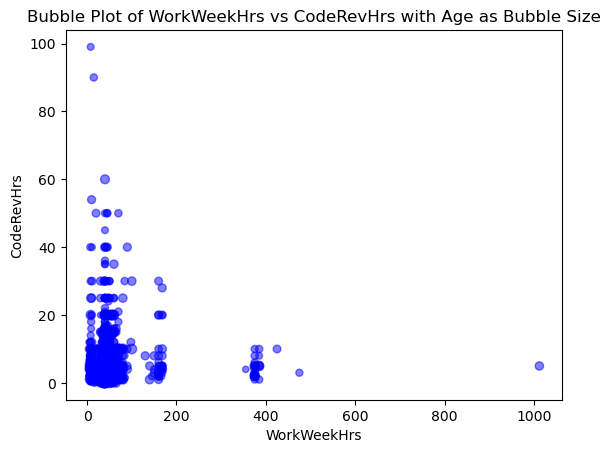

In [13]:
plt.scatter(wwh, crh, s=ag, alpha=0.5, c='blue')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs with Age as Bubble Size')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [14]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [15]:
QUERY = """
SELECT  DISTINCT DatabaseDesireNextYear, Respondent FROM DatabaseDesireNextYear

"""

df = pd.read_sql_query(QUERY,conn)
df

,DatabaseDesireNextYear,Respondent
0,MySQL,4
1,SQLite,4
2,PostgreSQL,9
3,Redis,9
4,SQLite,9
...,...,...
29570,Elasticsearch,25141
29571,MongoDB,25141
29572,Microsoft SQL Server,25141
29573,Redis,25141


In [16]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
group by databasedesirenextyear



"""
ddny = pd.read_sql_query(QUERY,conn)
#ddny.tail()
pc = ddny.sort_values(by='count', ascending=False).head()
pc

,DatabaseDesireNextYear,count
11,PostgreSQL,4328
7,MongoDB,3649
12,Redis,3331
8,MySQL,3281
3,Elasticsearch,2856


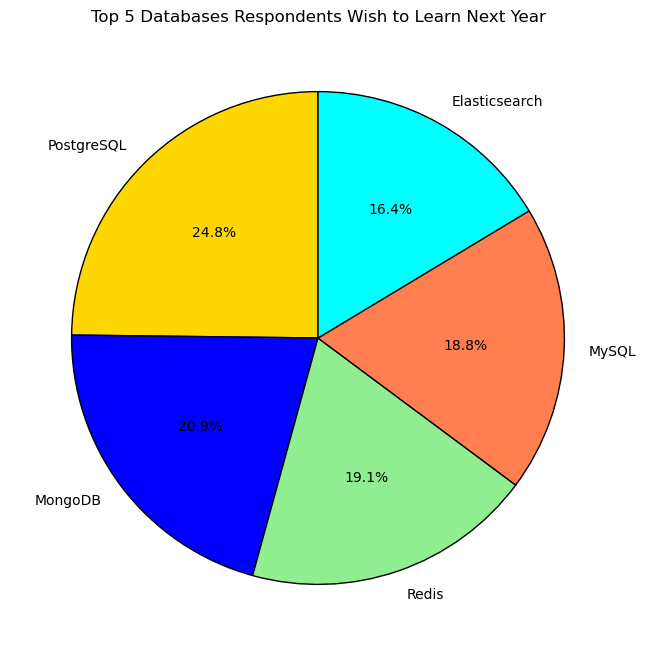

In [17]:
plt.figure(figsize=(8,8))
plt.pie(pc['count'], labels=pc['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle = 90, colors = ['gold','blue','lightgreen','coral','cyan','red'], wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

plt.show()

In [115]:
ddny.tail(5)


,DatabaseDesireNextYear,count,Rank
9,Oracle,870,10.0
10,Other(s):,645,11.0
11,PostgreSQL,4328,12.0
12,Redis,3331,13.0
13,SQLite,2437,14.0


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


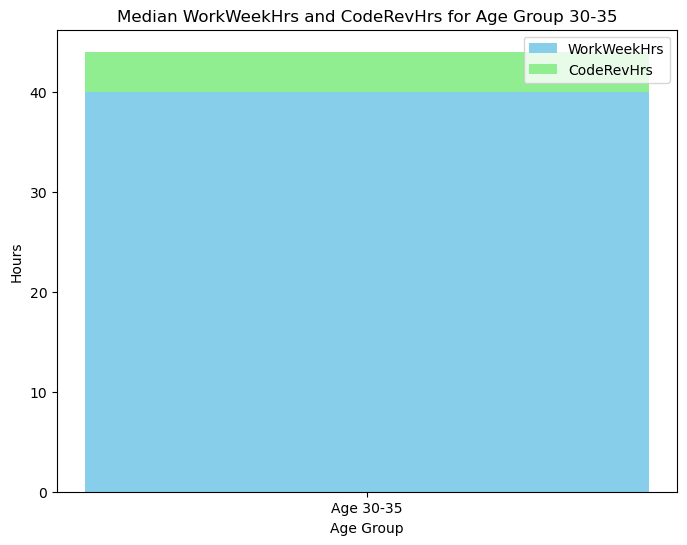

In [46]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""
awc = pd.read_sql_query(QUERY,conn)

age_group = awc[(awc['Age'] >=30) & (awc['Age'] <=35)]
med_wwh = age_group['WorkWeekHrs'].median()
med_crh = age_group['CodeRevHrs'].median()

categories = ['WorkWeekHrs', 'CodeRevHrs']
medians = [med_wwh, med_crh]

plt.figure(figsize=(8,6))
plt.bar('Age 30-35', med_wwh, label='WorkWeekHrs', color='skyblue')
plt.bar('Age 30-35', med_crh, bottom=med_wwh, label='CodeRevHrs', color='lightgreen')

plt.xlabel('Age Group')
plt.ylabel('Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

plt.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


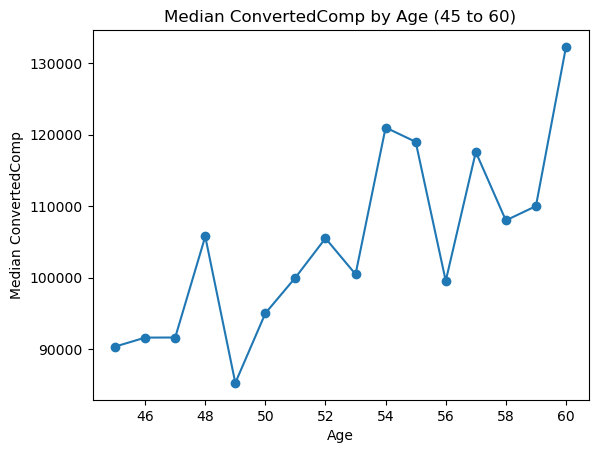

In [22]:
QUERY = """
SELECT  ConvertedComp, Age
FROM master 

"""
cc = pd.read_sql_query(QUERY,conn)
cc_filtered = cc[(cc['Age'] >=45) & (cc['Age'] <=60)]
med_cc_by_age = cc_filtered.groupby('Age')['ConvertedComp'].median().reset_index()
plt.plot(med_cc_by_age['Age'], med_cc_by_age['ConvertedComp'], marker ='o')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp by Age (45 to 60)')
plt.show()
#md = cc.median()
# age_cc = [cc[(cc['Age'] >=45) & (cc['Age'] <=60)],cc['ConvertedComp'].median()]
# med_cc = cc['ConvertedComp'].median()
# age_cc
#md

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


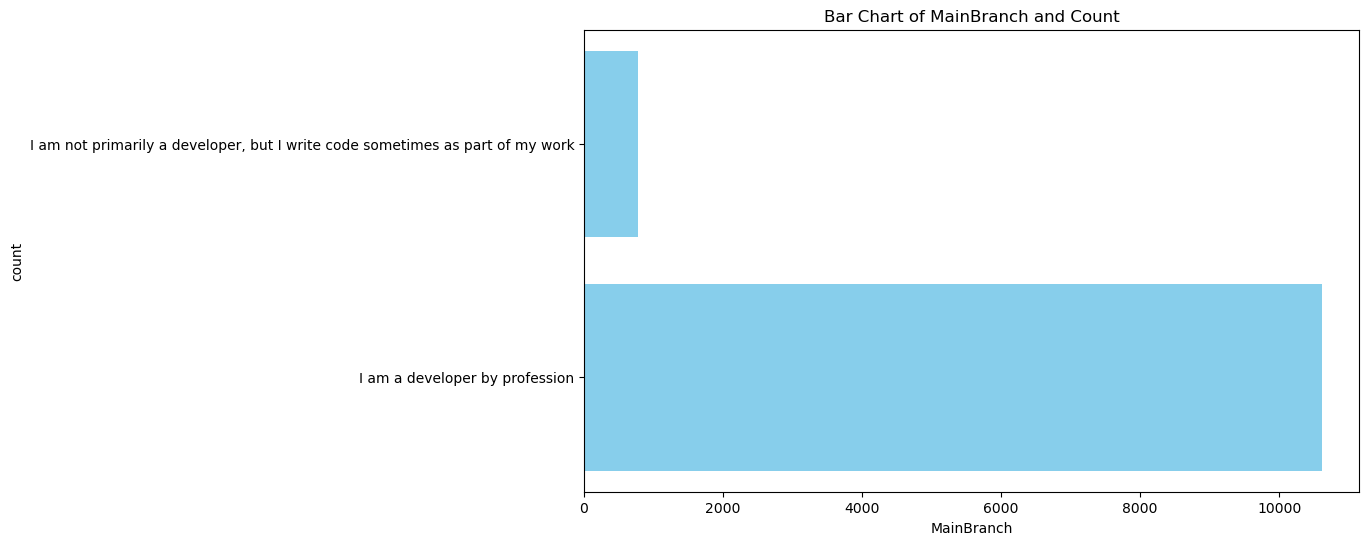

In [11]:
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
group by mainbranch
order by mainbranch

"""
mb = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,6))
plt.barh(mb['MainBranch'], mb['count'], color='skyblue')
plt.xlabel('MainBranch')
plt.ylabel('count')
plt.title('Bar Chart of MainBranch and Count')
plt.show()

Close the database connection.


In [23]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
